# Comparing IQ-Tree phylogenies generated for the Shaw-2021 E. coli dataset

### Maximillian Marin (mgmarin@g.harvard.edu)


In [280]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline


In [281]:
#import screed

In [282]:
#import mmh3

In [283]:
# https://github.com/ipython/ipython/issues/10627
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [284]:

import ete3 as ETE

from ete3 import Tree

## Define paths to sample metadata files & key directories

In [285]:

Proj_MainDir = "/n/data1/hms/dbmi/farhat/mm774/Projects"

Ecoli_PG_MainDir = f"{Proj_MainDir}/230905_Ecoli_PG_Analysis"  

Data_MainDir = f"{Ecoli_PG_MainDir}/Data"  

#RefSeq_20Asm_Dir = f"{Data_MainDir}/NCBI.RefSeq.20.EcoliGenomes.dataset/data"

Shaw2021_50Asm_Dir = f"{Data_MainDir}/Shaw2021.50Genomes.Data/data"

Shaw2021_Meta_TSV = f"{Data_MainDir}/Shaw2021.SelectedIsolates.50I.tsv"  

input_FA_PATH_TSVs_Dir = f"{Ecoli_PG_MainDir}/input_PATH_SMK_TSVs"

Shaw2021_Ecoli_50Asm_Meta_TSV = f"{input_FA_PATH_TSVs_Dir}/231011.Shaw2021.Ecoli.50I.MetaData.tsv"


## Parse in metadata DFs

In [286]:
Shaw_50A_Info_DF = pd.read_csv(Shaw2021_Ecoli_50Asm_Meta_TSV, sep = "\t")
Shaw_50A_Info_DF.shape

(50, 24)

### Define list of SampleIDs

In [287]:
Shaw_50A_Info_DF.head(1)  

,Isolate,Biosample Accession,Short Reads Accession,Long Reads Accession,Assembly Accession,Animal or WwTW,Isolate source information,Timepoint,Niche,Niche.2,...,Circularised plasmids,Number of contigs,Circularised chromosome (1=yes),Total genome size (bp),Chromosome GC (if known),Phylogroup (E. coli only),Alternative isolate name,Long read sequencing method,SampleID,Genome_ASM_PATH
0,RH02|T1-C02,SAMN15147960,SRR11948863,SRR12299015,GCA_014109125.1,Animal,Pooled pig faecal samples collected from floor...,1,Pig,Faeces,...,1,2,1,4953790,50.7,A,RHB02-C02,PacBio,GCA_014109125,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...


In [288]:
E50I_SampleIDs = Shaw_50A_Info_DF["SampleID"].values   
len(E50I_SampleIDs)

50

### Create lineage mapping for sampleIDs

In [289]:
ID_To_Lineage_Dict = dict(Shaw_50A_Info_DF[['SampleID', 'Phylogroup (E. coli only)']].values)


In [290]:
Shaw_50A_Info_DF["Phylogroup (E. coli only)"].value_counts().index.sort_values()

Index(['A', 'B1', 'B2', 'C', 'D', 'E', 'F', 'G', 'cladeV'], dtype='object')

In [291]:
Shaw_50A_Info_DF.head(5)

,Isolate,Biosample Accession,Short Reads Accession,Long Reads Accession,Assembly Accession,Animal or WwTW,Isolate source information,Timepoint,Niche,Niche.2,...,Circularised plasmids,Number of contigs,Circularised chromosome (1=yes),Total genome size (bp),Chromosome GC (if known),Phylogroup (E. coli only),Alternative isolate name,Long read sequencing method,SampleID,Genome_ASM_PATH
0,RH02|T1-C02,SAMN15147960,SRR11948863,SRR12299015,GCA_014109125.1,Animal,Pooled pig faecal samples collected from floor...,1,Pig,Faeces,...,1,2,1,4953790,50.7,A,RHB02-C02,PacBio,GCA_014109125,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...
1,RH02|T1-C06,SAMN15147963,SRR11948664,SRR12298958,GCA_014109065.1,Animal,Pooled pig faecal samples collected from floor...,1,Pig,Faeces,...,1,2,1,4950024,50.7,A,RHB02-C06,Nanopore,GCA_014109065,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...
2,RH02|T1-C10,SAMN15147965,SRR11949072,SRR12298585,GCA_013923405.1,Animal,Pooled pig faecal samples collected from floor...,1,Pig,Faeces,...,1,2,1,4951893,50.7,A,RHB02-C10,PacBio,GCA_013923405,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...
3,RH10|T3-C14,SAMN15148305,SRR11949198,SRR12298645,GCA_013821965.1,Animal,Pooled cattle faecal samples collected from fl...,3,Cattle,Faeces,...,3,4,1,4914446,50.9,A,RHB31-C14,Nanopore,GCA_013821965,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...
4,RH13|T3-C18,SAMN15148321,SRR11949196,SRR12298627,GCA_013819985.1,Animal,Pooled sheep faecal samples collected from flo...,3,Sheep,Faeces,...,3,4,1,4947025,50.8,B1,RHB32-C18,Nanopore,GCA_013819985,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...


In [292]:
Shaw_50A_Info_DF.tail(5)

,Isolate,Biosample Accession,Short Reads Accession,Long Reads Accession,Assembly Accession,Animal or WwTW,Isolate source information,Timepoint,Niche,Niche.2,...,Circularised plasmids,Number of contigs,Circularised chromosome (1=yes),Total genome size (bp),Chromosome GC (if known),Phylogroup (E. coli only),Alternative isolate name,Long read sequencing method,SampleID,Genome_ASM_PATH
45,RH04|T1-C23,SAMN15148116,SRR11948654,SRR12298597,GCA_013898775.1,Animal,Pooled pig faecal samples collected from floor...,1,Pig,Faeces,...,5,6,1,5203607,50.8,G,RHB14-C23,Nanopore,GCA_013898775,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...
46,RH04|T2-C22,SAMN15148265,SRR11949402,SRR12298761,GCA_013830785.1,Animal,Pooled pig faecal samples collected from floor...,2,Pig,Faeces,...,5,6,1,5754742,50.7,G,RHB27-C22,Nanopore,GCA_013830785,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...
47,RH12|T3-C04,SAMN15148434,SRR11949151,SRR12298532,GCA_013800125.1,Animal,Pooled sheep faecal samples collected from flo...,3,Sheep,Faeces,...,6,7,1,4937796,50.7,G,RHB42-C04,Nanopore,GCA_013800125,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...
48,WTP4|T3-00788,SAMN15148698,SRR11948877,SRR12298616,GCA_014103195.1,WTP,Freshwater sample from upstream of wastewater ...,3,WTP4,Upstream,...,1,257,0,5328374,NaN,G,RHBSTW-00788,Nanopore,GCA_014103195,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...
49,RH03|T1-C14,SAMN15148098,SRR11949103,SRR12298967,GCA_013602835.1,Animal,Pooled pig faecal samples collected from floor...,1,Pig,Faeces,...,10,12,1,5193338,51.0,G,RHB13-C14,Nanopore,GCA_013602835,/n/data1/hms/dbmi/farhat/mm774/Projects/230905...


### Create color mapping for sampleIDs (Based on phylo-lineage)

In [293]:
# Dictionary for lineage to color mapping
LinToColor_Dict = {
    "A": "#DF83AC",
    "B1": "#7098CB",
    "B2": "#815D9F",
    "C": "#E76956",
    "D": "#B67548",
    "E": "green",
    "F": "#6AB79E",
    "G": "#E4515B",
    "cladeV": "pur",
    "None": "black",
}
LinToColor_Dict = {
    "A": "#3BAF9F",  # Teal
    "B1": "#9DB17C",  # Light Olive Green
    "B2": "#D2A679",  # Earthy Ochre
    "C": "#9E9AC8",  # Soft Lavender
    "D": "#F88379",  # Coral Pink
    "E": "#BFFF00",  # Bright Lime Green
    "F": "#87CEEB",  # Sky Blue
    "G": "#800020",  # Muted Burgundy
    "cladeV": "#FFA500",  # Orange
    "None": "black",  # Default for undefined categories
}

# Extracting the mapping between IsolateID and PrimaryLineage_Ill
lineage_mapping = Shaw_50A_Info_DF.set_index('SampleID')['Phylogroup (E. coli only)'].to_dict()

# Creating a color mapping for the samples
sample_colors = {sample: LinToColor_Dict.get(lineage, "black") for sample, lineage in lineage_mapping.items()}

ID_To_PrimLineage_Dict = lineage_mapping


In [294]:
#ID_To_PrimLineage_Dict

### Look at lineage distribution across dataset

In [295]:
Shaw_50A_Info_DF["Phylogroup (E. coli only)"].value_counts()

C         7
B1        6
D         6
E         6
F         6
G         6
cladeV    5
A         4
B2        4
Name: Phylogroup (E. coli only), dtype: int64

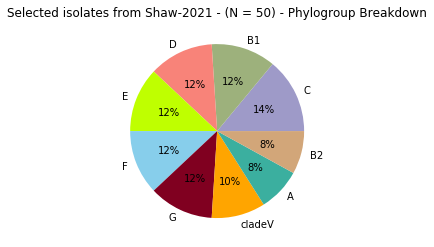

In [296]:
# https://www.statology.org/seaborn-pie-chart/

#define data
data = Shaw_50A_Info_DF["Phylogroup (E. coli only)"].value_counts().values
labels = Shaw_50A_Info_DF["Phylogroup (E. coli only)"].value_counts().index

#define Seaborn color palette to use
#colors = sns.color_palette('pastel')[0:5]

colors_for_labels = [ LinToColor_Dict[label] for label in labels]


#create pie chart
plt.title("Selected isolates from Shaw-2021 - (N = 50) - Phylogroup Breakdown")
plt.pie(data, labels = labels, colors = colors_for_labels, autopct='%.0f%%')
plt.show()


In [297]:
data

array([7, 6, 6, 6, 6, 6, 5, 4, 4])

In [298]:
labels

Index(['C', 'B1', 'D', 'E', 'F', 'G', 'cladeV', 'A', 'B2'], dtype='object')

# Define output dir of the Mtb-WGA-SMK processing pipeline

In [299]:
!ls -1 $Ecoli_PG_MainDir/

Data
input_PATH_SMK_TSVs
SMK_OutDirs


In [300]:
# Define varaint calling pipeline output directories

WGA_SMK_Outputs_Dir = f"{Ecoli_PG_MainDir}/SMK_OutDirs"

#PG_Ecoli_20I_OutDir = WGA_SMK_Outputs_Dir + "/230905_Ecoli_2OI_V1"
PG_Ecoli_50I_OutDir = WGA_SMK_Outputs_Dir + "/231011_Ecoli_Shaw2021_5OI_V1"


In [301]:
target_OutputDir = PG_Ecoli_50I_OutDir

i_Pangenome_Dir = f"{target_OutputDir}/PanGenome_Analysis"


## Parse IQ-Tree phylogeny

In [303]:
Phylos_OutDir = f"{target_OutputDir}/Phylogenies"

IQTree_OutDir = f"{Phylos_OutDir}/iqtree"

IQ_Tree_MP_PATH = f"{IQTree_OutDir}/Panaroo.Strict.MergeParalogs.MidRoot.WiNodeNames.newick"    


In [304]:
!ls -1 $Phylos_OutDir

iqtree


In [305]:
!ls -1 $IQTree_OutDir

Panaroo.Strict.MergeParalogs.bionj
Panaroo.Strict.MergeParalogs.ckp.gz
Panaroo.Strict.MergeParalogs.contree
Panaroo.Strict.MergeParalogs.iqtree
Panaroo.Strict.MergeParalogs.log
Panaroo.Strict.MergeParalogs.MidRoot.WiNodeNames.newick
Panaroo.Strict.MergeParalogs.mldist
Panaroo.Strict.MergeParalogs.splits.nex
Panaroo.Strict.MergeParalogs.treefile


In [306]:
!ls -lah $IQ_Tree_MP_PATH

-rw-rw-r-- 1 mm774 farhat 2.2K Jan  2 11:43 /n/data1/hms/dbmi/farhat/mm774/Projects/230905_Ecoli_PG_Analysis/SMK_OutDirs/231011_Ecoli_Shaw2021_5OI_V1/Phylogenies/iqtree/Panaroo.Strict.MergeParalogs.MidRoot.WiNodeNames.newick


In [307]:
IQ_Tree_MP = Tree(IQ_Tree_MP_PATH, format = 1)


In [308]:
# Count the number of nodes after midpoint rooting
num_nodes = len(IQ_Tree_MP.get_leaves()) + len([node for node in IQ_Tree_MP.traverse() if not node.is_leaf()])

print(num_nodes)

99


### Add lineage info to tree and sort by sub-lineage

In [309]:
count = 0
for n in IQ_Tree_MP.get_leaves():

    if "Bakta" in n.name:
        n.name = n.name.split(".")[0]
    
    n.add_feature("Primary_lineage", ID_To_PrimLineage_Dict.get(n.name, "Unknown Lineage") )
    #print("node:", n.name, " Lineage:", n.Mtb_lineage)
    count +=1

print(count)  
IQ_Tree_MP.sort_descendants(attr='Primary_lineage')


50


## Parsing over each node of the tree (ETE3) and infer lineage

In [310]:
IQ_node_To_PrimaryLin_Dict = {}

for node in IQ_Tree_MP.iter_descendants("postorder"):
    # Do some analysis on node
    
    #print(node.name)
    listOf_ChildLineages = []
    
    for child_node in node.get_descendants():
        if child_node.is_leaf():
            listOf_ChildLineages.append(  (child_node.Primary_lineage) )
        
        #print(node.name, listOf_ChildLineages)
        
    set_Of_ChildLineages = list(set(listOf_ChildLineages))

    #print(node.name, set_Of_ChildLineages  )
    
    if len(set_Of_ChildLineages) == 1:
        OnlyOneLineage = True
    else:
        OnlyOneLineage = False
    
    if OnlyOneLineage:
        IQ_node_To_PrimaryLin_Dict[node.name] = set_Of_ChildLineages[0]

IQ_node_To_PrimaryLin_Dict.update(ID_To_PrimLineage_Dict)
    

In [311]:
child_node.name

'GCA_014103465'

In [312]:
child_node.Primary_lineage

'cladeV'

## Output "node_To_PrimaryLin_Dict" dictionary 

In [22]:
import json 

IQ_NodeToPriLineage_Dict_JSON = f"{IQTree_OutDir}/IQTree.NodeToPrimaryLineage.json"

with open(IQ_NodeToPriLineage_Dict_JSON, 'w') as json_file:
    json.dump(IQ_node_To_PrimaryLin_Dict, json_file)


#### test reading back in the JSON

In [23]:
with open(IQ_NodeToPriLineage_Dict_JSON) as json_file:
    IQ_node_To_PrimaryLin_Dict = json.load(json_file)

In [24]:
len(list(IQ_node_To_PrimaryLin_Dict.keys()))

295

### Link to ETE3 documentation for tree layout style
 http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#interactive-visualization-of-trees

In [313]:

node_To_PrimaryLin_Dict= IQ_node_To_PrimaryLin_Dict
def ColorBranchByLineage_Layout(node):
    F = ETE.TextFace(node.name, fsize=2)
    if node.is_leaf():
        #NameAnd_Lineage_Text =  f"  {node.name} {node.Mtb_lineage}"
        #F_NameAndLineage = ETE.TextFace(NameAnd_Lineage_Text, fsize=3)
        
        #ETE.add_face_to_node(F_NameAndLineage, node, column=0, position="branch-right")

        
        nstyle = ETE.NodeStyle() # http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#node-style
        nstyle["fgcolor"] = "black"
        nstyle["size"] = 1
        
        Node_PrimaryLin = node_To_PrimaryLin_Dict.get(node.name, "None")
        
        nstyle["vt_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        nstyle["hz_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
          
        node.set_style(nstyle)
        node.margin_left = 10        
    else: 
        nstyle = ETE.NodeStyle() # http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#node-style
        nstyle["fgcolor"] = "black"
        nstyle["size"] = 0
        
        Node_PrimaryLin = node_To_PrimaryLin_Dict.get(node.name, "None")
        
        nstyle["vt_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        nstyle["hz_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        
        node.set_style(nstyle)


ts_1 = ETE.TreeStyle()
ts_1.show_leaf_name = False
ts_1.show_branch_length = False
ts_1.show_branch_support = False
ts_1.show_scale = False #True
#ts_1.branch_vertical_margin = 2
ts_1.layout_fn = ColorBranchByLineage_Layout
ts_1.rotation = 90


ts_3 = ETE.TreeStyle()
ts_3.show_leaf_name = False
ts_3.show_branch_length = False
ts_3.show_branch_support = False
ts_3.show_scale = True #True
ts_3.branch_vertical_margin = 2
ts_3.layout_fn = ColorBranchByLineage_Layout
ts_3.rotation = 90

ts_3_circ = ETE.TreeStyle()
ts_3_circ.mode = "c" # draw tree in circular mode
ts_3_circ.arc_start = 0 #-180 # 0 degrees = 3 o'clock
ts_3_circ.arc_span = 270
ts_3_circ.show_leaf_name = False
ts_3_circ.show_branch_length = False
ts_3_circ.show_branch_support = False
ts_3_circ.show_scale = False #True
ts_3_circ.branch_vertical_margin = 2
ts_3_circ.layout_fn = ColorBranchByLineage_Layout


## Visualize IQ-Tree Phylogeny

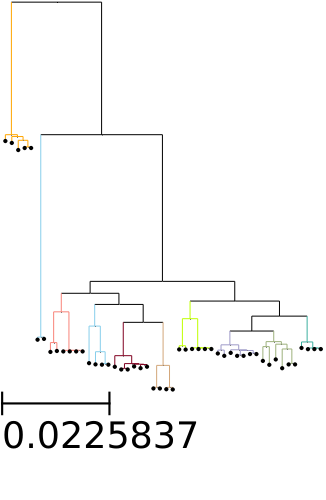

In [317]:
IQ_Tree_MP.render("%%inline", h = 500, tree_style = ts_3)

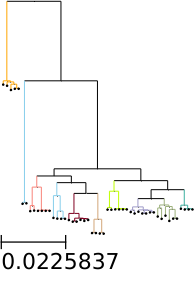

In [318]:
IQ_Tree_MP.render("%%inline", h = 300, tree_style = ts_3)

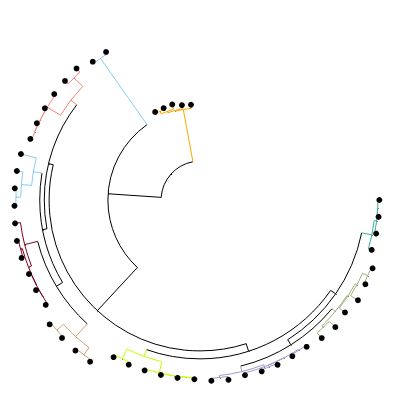

In [316]:
IQ_Tree_MP.render("%%inline", h = 400, tree_style = ts_3_circ)

### IQ-Tree NON fastTREE

In [ ]:
#PG_Strict_MP_PG_OutDir = "/n/data1/hms/dbmi/farhat/mm774/Projects/230905_Ecoli_PG_Analysis/SMK_OutDirs/231011_Ecoli_Shaw2021_5OI_V1/PanGenome_Analysis/Panaroo_Strict_MergeParalogs_AllIsolates_WiCoreAln"     
#IQ_Tree_PATH = f"{PG_Strict_MP_PG_OutDir}/Shaw2021.50I.core_tree.Try1.treefile"


In [278]:
# IQ_Tree_OG = Tree(IQ_Tree_PATH, format = 1)

# # Calculate the midpoint node
# midpoint = IQ_Tree_OG.get_midpoint_outgroup()

# # Set midpoint as outgroup.
# IQ_Tree_OG.set_outgroup(midpoint)

# ##### Give each internal node a unique name #####
# # Initialize a counter for unique names
# node_id = 0

# # Traverse the tree and rename ALL internal nodes of the tree
# for node in IQ_Tree_OG.traverse():
#     # Check if the node is an internal node
#     if not node.is_leaf():
#        # print(node.name, node.support)
#         if node.name == '':
#         # Assign a unique name (e.g., "Node_1", "Node_2", etc.)
#             node.name = f"Node_{node_id}"
#             node_id += 1
#             #print(f"Internal node renamed to {node.name}")
        
#     # If "Bakta" or "PGAP" is found in the node name, remove it by using split
#     else:
#         if "Bakta" in node.name:
#             node.name = node.name.split(".")[0]
            
#         elif "PGAP" in node.name:
#             node.name = node.name.split(".")[0]

#IQ_Tree_MP = IQ_Tree_OG

In [277]:
#IQ_Tree_MP.render("%%inline", w = 300, tree_style = ts_3)